# **Data Cleaning, Summary Statistics, and Correlation Analysis**


Explore several NHL datasets and conduct some data cleaning and preparation. Produce summary statistics and create graphs to understand the pattern of some variables and the relationship among them.

## Part 1- Data Coding and Merging

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")
display(NHL_Team)

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago
5,6,7,St. Louis Blues,Blues,St. Louis,STL,STL,St Louis
6,7,8,Pittsburgh Penguins,Penguins,Pittsburgh,PIT,PIT,Pittsburgh
7,8,10,Edmonton Oilers,Oilers,Edmonton,EDM,EDM,Edmonton
8,9,11,Calgary Flames,Flames,Calgary,CGY,CGY,Calgary
9,10,14,Philadelphia Flyers,Flyers,Philadelphia,PHI,PHI,Philadelphia


In [ ]:
#Drop and Rename
NHL_Team.drop(['Unnamed: 0', 'abbr', 'tname', 'lname', 'sname'], axis=1, inplace=True)
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)
display(NHL_Team)

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI
5,7,St. Louis Blues,STL
6,8,Pittsburgh Penguins,PIT
7,10,Edmonton Oilers,EDM
8,11,Calgary Flames,CGY
9,14,Philadelphia Flyers,PHI


In [ ]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


In [ ]:
#Drop and Rename
NHL_Competition.drop(['Unnamed: 0', 'tz', 'start', 'end'], axis=1, inplace=True)
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [ ]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [ ]:
#Drop
NHL_Game.drop(['X', 'period', 'status'], axis=1,inplace=True)
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [ ]:
#Merge NHL Team and NHL Game by tid
NHL_Game=pd.merge(NHL_Team, NHL_Game, on=['tid'])
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away
2,1,Toronto Maple Leafs,TOR,5225,5181,4/25/2017,NaN,NaN,away
3,1,Toronto Maple Leafs,TOR,6557,5385,1/7/2016,NaN,NaN,away
4,1,Toronto Maple Leafs,TOR,6914,5385,2/7/2016,NaN,NaN,away


In [ ]:
#Merge NHL Competition and NHL Game by tid
NHL_Game=pd.merge(NHL_Game, NHL_Competition, on=['comp_id'])
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,competition_name
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season
2,1,Toronto Maple Leafs,TOR,1003,1,12/17/2013,1.0,3.0,away,2013,2,2013 NHL Regular Season
3,1,Toronto Maple Leafs,TOR,1552,1,1/26/2014,4.0,5.0,away,2013,2,2013 NHL Regular Season
4,1,Toronto Maple Leafs,TOR,1811,1,3/2/2014,3.0,4.0,away,2013,2,2013 NHL Regular Season


In [ ]:
#create a variable “hgd” to indicate the goal difference between home and away score (hscore – ascore) and delete observations with missing value in the variable “hgd
NHL_Game['hgd']=NHL_Game['hscore']-NHL_Game['ascore']
NHL_Game=NHL_Game[pd.notnull(NHL_Game["hgd"])]
NHL_Game.shape


(18506, 13)

In [ ]:
#Drop all observations with missing values, if there is still any, from the “NHL_Game” dataframe.
NHL_Game=NHL_Game.dropna()
NHL_Game.shape


(18506, 13)

In [ ]:
#Convert the type of the “date” variable from “object” to “datetime.”

NHL_Game['date'].dtype

dtype('O')

In [ ]:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
#NHL_Game['date'].head()
earliest_date = NHL_Game['date'].min()
latest_date = NHL_Game['date'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2010-10-07 00:00:00
Latest Date: 2018-06-08 00:00:00


In [ ]:
#Sort the NHL games by “date” and show the first 15 observations.

NHL_Game.sort_values(by=['date'], ascending=[True]).head(20).reset_index()

,index,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,competition_name,hgd
0,7652,1,Toronto Maple Leafs,TOR,5662,5662,2010-10-07,2.0,3.0,home,2010,2,2010 NHL Regular Season,1.0
1,7699,2,Montréal Canadiens,MTL,5662,5662,2010-10-07,2.0,3.0,away,2010,2,2010 NHL Regular Season,1.0
2,8251,14,Philadelphia Flyers,PHI,5664,5662,2010-10-07,3.0,2.0,away,2010,2,2010 NHL Regular Season,-1.0
3,9271,35,Minnesota Wild,MIN,5666,5662,2010-10-07,4.0,3.0,home,2010,2,2010 NHL Regular Season,-1.0
4,9882,66,Carolina Hurricanes,CAR,5666,5662,2010-10-07,4.0,3.0,away,2010,2,2010 NHL Regular Season,-1.0
5,8043,8,Pittsburgh Penguins,PIT,5664,5662,2010-10-07,3.0,2.0,home,2010,2,2010 NHL Regular Season,-1.0
6,9103,29,New Jersey Devils,NJD,5674,5662,2010-10-08,4.0,3.0,home,2010,2,2010 NHL Regular Season,-1.0
7,9469,46,Dallas Stars,DAL,5674,5662,2010-10-08,4.0,3.0,away,2010,2,2010 NHL Regular Season,-1.0
8,7760,5,Washington Capitals,WSH,5683,5662,2010-10-08,2.0,4.0,away,2010,2,2010 NHL Regular Season,2.0
9,9233,35,Minnesota Wild,MIN,5677,5662,2010-10-08,1.0,2.0,away,2010,2,2010 NHL Regular Season,1.0


In [ ]:
#Create two dataframes that separate the “NHL_Game” dataframe by home and away games. Name them “NHL_Home” and “NHL_Away”, respectively.
NHL_Home = NHL_Game[NHL_Game['home_away'] == 'home']
NHL_Home

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,competition_name,hgd
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0
47,1,Toronto Maple Leafs,TOR,1015,1,2013-12-18,3.0,1.0,home,2013,2,2013 NHL Regular Season,-2.0
48,1,Toronto Maple Leafs,TOR,584,1,2013-11-17,2.0,4.0,home,2013,2,2013 NHL Regular Season,2.0
49,1,Toronto Maple Leafs,TOR,891,1,2013-12-09,5.0,2.0,home,2013,2,2013 NHL Regular Season,-3.0
50,1,Toronto Maple Leafs,TOR,257,1,2013-10-22,2.0,4.0,home,2013,2,2013 NHL Regular Season,2.0
51,1,Toronto Maple Leafs,TOR,193,1,2013-10-17,3.0,2.0,home,2013,2,2013 NHL Regular Season,-1.0


In [ ]:
#Creating away dataframe
NHL_Away = NHL_Game[NHL_Game['home_away'] == 'away']
NHL_Away

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,competition_name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0
7,1,Toronto Maple Leafs,TOR,872,1,2013-12-08,5.0,3.0,away,2013,2,2013 NHL Regular Season,-2.0
8,1,Toronto Maple Leafs,TOR,1859,1,2014-03-06,3.0,2.0,away,2013,2,2013 NHL Regular Season,-1.0
9,1,Toronto Maple Leafs,TOR,295,1,2013-10-25,2.0,5.0,away,2013,2,2013 NHL Regular Season,3.0
10,1,Toronto Maple Leafs,TOR,412,1,2013-11-02,0.0,4.0,away,2013,2,2013 NHL Regular Season,4.0
11,1,Toronto Maple Leafs,TOR,564,1,2013-11-16,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0


In [ ]:
#For away games, rename “ascore” to “goals_for”; rename “hscore” to “goals_against”
NHL_Away.rename(columns={'ascore':'goals_for', 'hscore':'goals_against'}, inplace=True)
display(NHL_Away)


,tid,team_name,tricode,gid,comp_id,date,goals_for,goals_against,home_away,year,type,competition_name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0
7,1,Toronto Maple Leafs,TOR,872,1,2013-12-08,5.0,3.0,away,2013,2,2013 NHL Regular Season,-2.0
8,1,Toronto Maple Leafs,TOR,1859,1,2014-03-06,3.0,2.0,away,2013,2,2013 NHL Regular Season,-1.0
9,1,Toronto Maple Leafs,TOR,295,1,2013-10-25,2.0,5.0,away,2013,2,2013 NHL Regular Season,3.0
10,1,Toronto Maple Leafs,TOR,412,1,2013-11-02,0.0,4.0,away,2013,2,2013 NHL Regular Season,4.0
11,1,Toronto Maple Leafs,TOR,564,1,2013-11-16,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0


In [ ]:
#For home games, rename “hscore” to “goals_for”; rename “ascore” to “goals_against”
NHL_Home.rename(columns={'ascore':'goals_against', 'hscore':'goals_for'}, inplace=True)
display(NHL_Home)


,tid,team_name,tricode,gid,comp_id,date,goals_against,goals_for,home_away,year,type,competition_name,hgd
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0
47,1,Toronto Maple Leafs,TOR,1015,1,2013-12-18,3.0,1.0,home,2013,2,2013 NHL Regular Season,-2.0
48,1,Toronto Maple Leafs,TOR,584,1,2013-11-17,2.0,4.0,home,2013,2,2013 NHL Regular Season,2.0
49,1,Toronto Maple Leafs,TOR,891,1,2013-12-09,5.0,2.0,home,2013,2,2013 NHL Regular Season,-3.0
50,1,Toronto Maple Leafs,TOR,257,1,2013-10-22,2.0,4.0,home,2013,2,2013 NHL Regular Season,2.0
51,1,Toronto Maple Leafs,TOR,193,1,2013-10-17,3.0,2.0,home,2013,2,2013 NHL Regular Season,-1.0


In [ ]:
#Create a “winvalue” variable that equals to 1 if the team won the game; 0 if the team lost the game; and 0.5 if it was a draw.
#Add win count
NHL_Home['winvalue']=np.where(NHL_Home['hgd']>= 1,1,np.where(NHL_Home['hgd']==0,.5,0))
#NHL_Home['wins']=np.where(NHL_Home['goals_for']> NHL_Home['goals_against'],1,0)
NHL_Home['wins'] = np.where(NHL_Home['goals_for'] > NHL_Home['goals_against'], 1,np.where(NHL_Home['goals_for'] == NHL_Home['goals_against'], 0.5, 0))

NHL_Home['count']=1
NHL_Away['winvalue']=np.where(NHL_Away['hgd']>= 1,1,np.where(NHL_Away['hgd']==0,.5,0))
#NHL_Away['wins']=np.where(NHL_Away['goals_for']> NHL_Away['goals_against'],1,0)
NHL_Away['wins'] = np.where(NHL_Away['goals_for'] > NHL_Away['goals_against'], 1,np.where(NHL_Away['goals_for'] == NHL_Away['goals_against'], 0.5, 0))
NHL_Away['count']=1

In [ ]:
#Append the “NHL_Home” and “NHL_Away” dataframes to be the new “NHL_Game” dataframe.
NHL_Game = pd.concat([NHL_Home,NHL_Away])
NHL_Game

,comp_id,competition_name,count,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,wins,winvalue,year
42,1,2013 NHL Regular Season,1,2013-10-26,307,1.0,4.0,3.0,home,Toronto Maple Leafs,1,TOR,2,1.0,1.0,2013
43,1,2013 NHL Regular Season,1,2013-11-24,682,2.0,3.0,1.0,home,Toronto Maple Leafs,1,TOR,2,1.0,1.0,2013
44,1,2013 NHL Regular Season,1,2014-03-25,2150,5.0,3.0,-2.0,home,Toronto Maple Leafs,1,TOR,2,0.0,0.0,2013
45,1,2013 NHL Regular Season,1,2014-03-19,2067,5.0,3.0,-2.0,home,Toronto Maple Leafs,1,TOR,2,0.0,0.0,2013
46,1,2013 NHL Regular Season,1,2014-04-03,2281,3.0,4.0,1.0,home,Toronto Maple Leafs,1,TOR,2,1.0,1.0,2013
47,1,2013 NHL Regular Season,1,2013-12-18,1015,3.0,1.0,-2.0,home,Toronto Maple Leafs,1,TOR,2,0.0,0.0,2013
48,1,2013 NHL Regular Season,1,2013-11-17,584,2.0,4.0,2.0,home,Toronto Maple Leafs,1,TOR,2,1.0,1.0,2013
49,1,2013 NHL Regular Season,1,2013-12-09,891,5.0,2.0,-3.0,home,Toronto Maple Leafs,1,TOR,2,0.0,0.0,2013
50,1,2013 NHL Regular Season,1,2013-10-22,257,2.0,4.0,2.0,home,Toronto Maple Leafs,1,TOR,2,1.0,1.0,2013
51,1,2013 NHL Regular Season,1,2013-10-17,193,3.0,2.0,-1.0,home,Toronto Maple Leafs,1,TOR,2,0.0,0.0,2013


In [ ]:
#Generate a team level dataframe that aggregates the total number of games won, the total number of “goals_for” and “goals_against” for each team in each competition (i.e. grouped by tid, competition_name and type). Name this new dataframe “NHL_Team_Stats”. Make sure to convert the indexes of the new dataframe back as  variables.

NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name', 'type'])[['wins', 'goals_for', 'goals_against']].sum().reset_index()
NHL_Team_Stats



,tid,competition_name,type,wins,goals_for,goals_against
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0
7,1,2016 NHL Playoff,3,2.0,16.0,18.0
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0
9,1,2017 NHL Playoff,3,3.0,20.0,28.0


In [ ]:
#Create a dataframe “NHL_Game_Count” that include the total number of games played by each team in each competition (i.e. grouped by tid, competition_name and type). Name this new variable in the dataframe “game_count”.
NHL_Game_Count = NHL_Game.groupby(['tid', 'competition_name', 'type'])[['count']].sum().reset_index()
NHL_Game_Count = NHL_Game_Count.rename(columns={'count':'game_count'})
NHL_Game_Count



,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
5,1,2014 NHL Regular Season,2,78
6,1,2015 NHL Regular Season,2,79
7,1,2016 NHL Playoff,3,6
8,1,2016 NHL Regular Season,2,82
9,1,2017 NHL Playoff,3,7


In [ ]:
#Merge the “NHL_Game_Count” dataframe into the “NHL_Team_Stats” dataframe by “tid”, “competition_name”, and “type”. Continue to name the merged dataframe “NHL_Team_Stats”.
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid', 'competition_name', 'type'])
NHL_Team_Stats.head()



,tid,competition_name,type,wins,goals_for,goals_against,game_count
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79


In [ ]:
#Merge the “NHL_Team” dataframe into the “NHL_Team_Stats” dataframe by “tid”. Continue to name the merged dataframe “NHL_Team_Stats”.
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Team, on=['tid'])
NHL_Team_Stats.head()


,tid,competition_name,type,wins,goals_for,goals_against,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR


In [ ]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [ ]:
#Merge the “NHL_PPPK” dataframe into the “NHL_Team_Stats” dataframe by “tricode” and “competition_name”.

NHL_Team_Stats=pd.merge(NHL_PPPK, NHL_Team_Stats, on=['tricode', 'competition_name' ])
NHL_Team_Stats.head()



,tricode,pp,pk,ppgf,competition_name,tid,type,wins,goals_for,goals_against,game_count,team_name
0,ANA,35,27,9.0,2010 NHL Playoff,21,3,2.0,19.0,22.0,6,Anaheim Ducks
1,BOS,126,116,22.0,2010 NHL Playoff,20,3,16.0,76.0,48.0,24,Boston Bruins
2,BUF,48,46,13.0,2010 NHL Playoff,17,3,3.0,17.0,22.0,7,Buffalo Sabres
3,CHI,27,39,6.0,2010 NHL Playoff,6,3,3.0,22.0,16.0,7,Chicago Blackhawks
4,DET,59,55,6.0,2010 NHL Playoff,18,3,7.0,36.0,27.0,11,Detroit Red Wings


In [ ]:
#Create new variables in the “NHL_Team_Stats” dataframe.
## Winning percentage (“win_pct”)=”win”/ total number of games played
## Average goals for per game (“avg_gf”)=total number of goals for / total number of games played
## Average goals against per game (“avg_ga”)=total number of goals against / total number of games played

NHL_Team_Stats['win_pct']=NHL_Team_Stats['wins']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf']=NHL_Team_Stats['goals_for']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga']=NHL_Team_Stats['goals_against']/NHL_Team_Stats['game_count']

#NHL_Team_Stats
NHL_Team_Stats['win_pct'].describe()

count    369.000000
mean       0.472158
std        0.134584
min        0.000000
25%        0.406667
50%        0.500000
75%        0.562500
max        0.800000
Name: win_pct, dtype: float64

In [ ]:
#In the “NHL_Competition” dataframe, the variable “type” indicates the type of competition: type=2 – regular season. Create a dataframe that contains team statistics for games only during regular seasons. Name this dataframe “NHL_Team_R_Stats”.

NHL_Team_R_Stats= NHL_Team_Stats[NHL_Team_Stats['type'] == 2]
NHL_Team_R_Stats



,tricode,pp,pk,ppgf,competition_name,tid,type,wins,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
16,ANA,401,378,92.0,2010 NHL Regular Season,21,2,43.5,227.0,225.0,78,Anaheim Ducks,0.557692,2.910256,2.884615
17,ATL,338,341,35.0,2010 NHL Regular Season,11366,2,34.0,223.0,263.0,79,Atlanta Thrashers,0.430380,2.822785,3.329114
18,BOS,368,370,74.0,2010 NHL Regular Season,20,2,46.0,250.0,200.0,82,Boston Bruins,0.560976,3.048780,2.439024
19,BUF,393,364,83.0,2010 NHL Regular Season,17,2,43.0,251.0,235.0,82,Buffalo Sabres,0.524390,3.060976,2.865854
20,CAR,338,427,79.0,2010 NHL Regular Season,66,2,40.0,239.0,242.0,82,Carolina Hurricanes,0.487805,2.914634,2.951220
21,CBJ,423,416,45.0,2010 NHL Regular Season,52,2,33.5,221.0,260.0,81,Columbus Blue Jackets,0.413580,2.728395,3.209877
22,CGY,343,374,90.0,2010 NHL Regular Season,11,2,40.5,250.0,241.0,80,Calgary Flames,0.506250,3.125000,3.012500
23,CHI,296,310,93.0,2010 NHL Regular Season,6,2,41.5,246.0,222.0,78,Chicago Blackhawks,0.532051,3.153846,2.846154
24,COL,390,338,61.0,2010 NHL Regular Season,22,2,30.5,218.0,272.0,79,Colorado Avalanche,0.386076,2.759494,3.443038
25,DAL,382,416,72.0,2010 NHL Regular Season,46,2,42.5,237.0,234.0,81,Dallas Stars,0.524691,2.925926,2.888889


## Part 2 - Descriptive and Summary Analyses

In [ ]:
#In the “NHL_Game” dataframe, calculate summary statistics for the  “goals_for” variable
NHL_Game['goals_for'].describe()


count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [ ]:
#; calculate summary statistics for the “goals_against” variable based on whether it is home or away game
#NHL_Game['goals_against'].describe()
ga_summary_stats_grouped = NHL_Game.groupby('home_away')['goals_against'].describe()
ga_summary_stats_grouped


,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


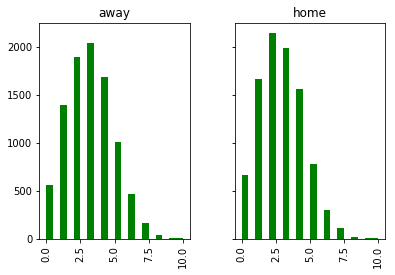

In [ ]:
#Create a histogram of the “goals_against” variable by whether the game is home or away
## Make the color of the histogram green
## Set the number of bins to be 20
## Make sure the two sub-histograms share the same ranges for the x-axis and y-axis.

NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)
plt.savefig('goals_against_home_away.png')


## Part 3 - Correlation Analyses


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

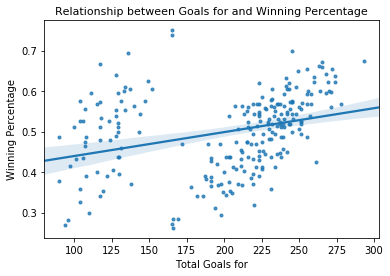

In [ ]:
#In the “NHL_Team_R_Stats” dataframe, make a scatter plot to depict the relationship between the total number of goals for and the winning percentage.
##a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
#b) Add a regression line to the scatter plot.
#c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
#d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)


In [ ]:
#In the “NHL_Team_R_Stats” dataframe, calculate the correlation coefficient between total number of goals for and winning percentage.


NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])



0.31566456280848165

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

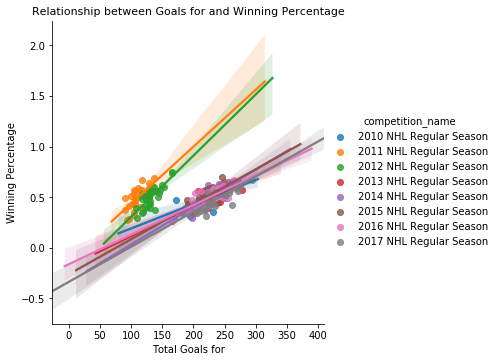

In [ ]:
#Create a scatter plot of the total number of goals for and winning percentage similar to step 1 for regular season games. In this graph, group observations by “competition_name”.
#a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
#b) Add a regression line to the scatter plot.
#c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
#d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)




In [ ]:
# For the “NHL_Team_R_Stats” dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe “NHL_Team_R_Stats”.
NHL_Team_R_Stats = NHL_Team_R_Stats[(NHL_Team_R_Stats['competition_name'] != "2011 NHL Regular Season") & (NHL_Team_R_Stats['competition_name'] != "2012 NHL Regular Season")]

# Display the first few rows of the modified DataFrame
NHL_Team_R_Stats.head()


,tricode,pp,pk,ppgf,competition_name,tid,type,wins,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
16,ANA,401,378,92.0,2010 NHL Regular Season,21,2,43.5,227.0,225.0,78,Anaheim Ducks,0.557692,2.910256,2.884615
17,ATL,338,341,35.0,2010 NHL Regular Season,11366,2,34.0,223.0,263.0,79,Atlanta Thrashers,0.430380,2.822785,3.329114
18,BOS,368,370,74.0,2010 NHL Regular Season,20,2,46.0,250.0,200.0,82,Boston Bruins,0.560976,3.048780,2.439024
19,BUF,393,364,83.0,2010 NHL Regular Season,17,2,43.0,251.0,235.0,82,Buffalo Sabres,0.524390,3.060976,2.865854
20,CAR,338,427,79.0,2010 NHL Regular Season,66,2,40.0,239.0,242.0,82,Carolina Hurricanes,0.487805,2.914634,2.951220


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

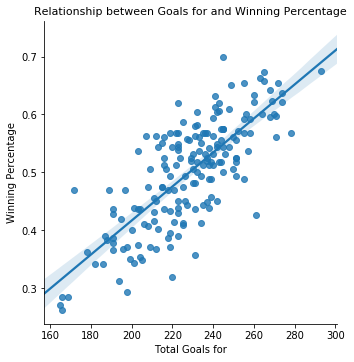

In [ ]:
#In the new “NHL_Team_R_Stats” dataframe, create a scatter plot of total number of goals for and winning percentage.
#a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
#b) Add a regression line to the scatter plot.
#c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
#d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

sns.lmplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)



In [ ]:
#Calculate the correlation coefficient between total number of goals for and winning percentage in the updated “NHL_Team_R_Stats” dataframe.

NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])



0.770625532180144

# Save Dataframes

In [ ]:
#Save Dataframes as .csv files
NHL_Game.to_csv("NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)